In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
def pos(x,y):
    return np.array([x,y])

# Orbit

In [68]:
def leap_kdk(G,Ms,Me,r,v,tm,dt):

    vl = []
    rmagl=[]
    
    rx = []
    ry=[]
    vx=[]
    vy=[]
    
    time = []
    energy = []
    
    rm0=np.linalg.norm(r/1.496e11)
    rx.append(r[0])
    ry.append(r[1])
    vx.append(v[0])
    vy.append(v[1])
    f1 = G*Ms*(r)/np.power(np.linalg.norm(r),3.0)
    angl = []
    for i in np.arange(0,tm,dt):

        
        r[0] +=   dt*(v[0])*0.5
        r[1] +=  (v[1])*dt*0.5
       
        
        r = pos(r[0],r[1])
    
        
        f = G*Ms*(r)/np.power(np.linalg.norm(r),3.0)
       
        v[0] -= (f[0])*dt
        v[1] -= (f[1])*dt
        
        r[0] +=   dt*(v[0])*0.5
        r[1] +=  (v[1])*dt*0.5
        
        ang = 2*1.40928e-15*np.linalg.norm(np.cross(r,v)/2)
        angl.append(ang)
       
        
        
        
        
        rmag = np.linalg.norm(r)
        rmagl.append(rmag)
      
        eng = (Me*np.dot(v,v)/2) - G*Me*Ms/(np.linalg.norm(r))
        rx.append(r[0])
        ry.append(r[1])
        time.append(i)
        energy.append(eng)

    rx = np.array(rx)/1.496e11
    ry = np.array(ry)/1.496e11

    #plt.figure(figsize=(10,8),dpi=100)
    #plt.plot(rx,ry)
    #plt.xlabel('x (AU)',fontsize=18)
    #plt.ylabel('y (AU)',fontsize=18)
    #plt.title("Orbital motion of Earth around Sun",fontsize=18)
    #plt.xticks(fontsize=18)
    #plt.yticks(fontsize=18)
    #plt.show()
    #plt.savefig('orbit.png')


    time = np.array(time)/3.154e7
    energy = np.array(energy)/10e33

    #plt.figure(figsize=(10,8),dpi=100)
    #plt.plot(time,energy)
    #plt.xlabel('Time (year)',fontsize=18)
    #plt.ylabel('Energy (10e33 X J)',fontsize=18)
    #plt.title("Total energy vs Time",fontsize=18)
    #plt.xticks(fontsize=18)
    #plt.yticks(fontsize=18)
    #plt.show()
    #plt.savefig('energy-time.png')
    
    return rx, ry, rmagl, time, angl, vx, vy, rm0


# Planet Orbit data

In [9]:
G = 6.67e-11
Ms = 1.98e30


Me = 5.972e24
x0 = 147098291000
#x0 = 152098233000
y0 = 0
r = np.array([x0,y0])
ve =9000
vx0 = 0
vy0 = np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) 
v = np.array([vx0,vy0+ve])
dt = 0.08*24*60*60
tm = 2077.726*24*60*60
earth = leap_kdk(G,Ms,Me,r,v,tm,dt)

rx = np.array(earth[0]) 
ry=np.array(earth[1])
rm = np.array(earth[2])
area = np.array(earth[4])
t = np.array(earth[3])
vx = np.array(earth[5])
vy = np.array(earth[6])
rm0 = earth[7]


# Eccentricity, Major axis

In [10]:

def ecc(rx,ry):
    major = (abs(np.min(rx)) + abs(np.max(rx)))/2
    minor = (abs(np.min(ry)) + abs(np.max(ry)))/2
    #ecc = (abs(np.min(rx)) - abs(np.max(rx)) )/(abs(np.min(rx)) + abs(np.max(rx)))
    ecc = np.sqrt(1-(minor/major)**2)
    
    return ecc, major, minor


    





In [11]:
ecc(rx,ry)


(0.6909518745345684, 3.181631366858289, 2.300003729331551)

# Orbit number and time period

In [12]:
#time period and orbits number
def orb_time(rm,rm0,ry,t):
    #timep=[]
    #for i in range(len(t2)):
    #    if (abs(ry2[i])<=dt*0.01/(24*60*60)):
    #        timep.append(t2[i])
    norb = 0  
    timep = []
    nindex = []
   
    
    for i in np.arange(1,len(t),1):
        
        rmin = np.min(rm[:i])/1.496e11 
        if (rmin<(rm0) ):
            rm0 = rmin
            norb += 1
            timep.append(t[i])
          
    t = list(t)
    for i in range(len(timep)):
        index = t.index(timep[i])
        nindex.append(index)
    return timep, norb, nindex



orb_p = orb_time(rm,rm0,ry,t)
print(orb_p)

([], 0, [])


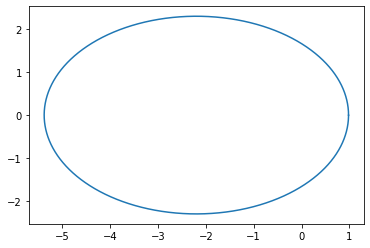

In [13]:
plt.plot(rx,ry)

In [126]:
#each orbit

timep = param[0]
rmag0 = param[1]
nindex = param[2]



eccv = []
arean=[]
timen = []
def nthorb(timep, rmag0, nindex, rx, ry, t, area):
    for i in range(len(nindex)-1):
        rxn = rx[nindex[i]:nindex[i+1]]
        ryn = ry[nindex[i]:nindex[i+1]]
        arean.append(area[nindex[i]:nindex[i+1]])
        #params for each orbit
        eccv.append(ecc(rxn,ryn))
        timen.append(t[nindex[i]:nindex[i+1]])
        
        
    return eccv, arean, timen


nthorbl = nthorb(timep, rmag0, nindex, rx2, ry2, t2, area)

print(nthorbl[2])

NameError: name 'param' is not defined

In [127]:
plt.plot(nthorbl[2][0],nthorbl[1][0]/1e15)
plt.plot(nthorbl[2][0],nthorbl[1][2]/1e15)

plt.show()

NameError: name 'nthorbl' is not defined

# fitting

In [58]:
#fitting
eccen = ecc(rx,ry)
eccv = eccen[0]
a = eccen[1]
b = eccen[2]
def elipse_fit(rx,ry,eccv,a):
    e = eccv

    theta = np.arange(0,2*np.pi,0.1)

    rad = a*(1-e*e)/(1+e*np.cos(theta))
   
    y = rad*np.sin(theta)
    x = rad*np.cos(theta)
    
    
    #plt.scatter(x,y,s=14)
    #plt.plot(rx,ry)
    #plt.show()
    return x,y
     
    
    
    
    
print(elipse_fit(rx,ry,eccv,a))


(array([ 0.98327707,  0.98004361,  0.97030901,  0.95397017,  0.9308539 ,
        0.90071489,  0.86323309,  0.81801051,  0.76456774,  0.70234065,
        0.63067772,  0.54883897,  0.45599775,  0.35124708,  0.23361335,
        0.10208067, -0.04436917, -0.20669501, -0.38570527, -0.58192858,
       -0.79543747, -1.0256181 , -1.27088588, -1.52835947, -1.79352682,
       -2.05996751, -2.31922952, -2.56098417, -2.77357776, -2.94503807,
       -3.06446818, -3.12359556, -3.11811155, -3.04842177, -2.91957404,
       -2.74038661, -2.52204537, -2.27655789, -2.01541308, -1.74865062,
       -1.48438257, -1.22869418, -0.9858013 , -0.75834349, -0.54772014,
       -0.35441121, -0.1782529 , -0.01865858,  0.12521336,  0.25433719,
        0.36973438,  0.472416  ,  0.56334582,  0.64341803,  0.71344501,
        0.77415189,  0.82617535,  0.87006507,  0.90628653,  0.93522438,
        0.95718589,  0.97240406,  0.98104019]), array([ 0.        ,  0.09833235,  0.19669137,  0.29509756,  0.39355872,
        0.49206

In [318]:
# second method
#import math
#import cmath
#r = np.sqrt(rx*rx + ry*ry)

#theta=[]
#for i in range(len(r)):
#    thetav = math.atan2(ry[i],rx[i])
#    theta.append(thetav)
#theta = np.array(theta)



#b = r*np.cos(theta)

#aa = np.ones(len(r))
#a = aa*a
#c= r-a
#d = (b**2) - (4*a*c)

#sol = []
#for i in range(len(r)):
#    if (d[i]>0):
#        sol1 = (-b[i]-np.sqrt(d[i]))/(2*a[i])
#    if (sol1<0 and d[i]>0):
#        sol1 = (-b[i]+np.sqrt(d[i]))/(2*a[i])
#    sol.append(sol1)


#plt.plot(r,sol)

# Second law

In [78]:
G = 6.67e-11
Ms = 1.98e30


Me = 5.972e24
x0 = 147098291000
#x0 = 152098233000
y0 = 0
r = np.array([x0,y0])
ve = 7000
vx0 = 0
vy0 = np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) 
v = np.array([vx0,vy0+ve])
dt = 0.1*24*60*60
tm = 1080*24*60*60
earth = leap_kdk(G,Ms,Me,r,v,tm,dt)

rx = np.array(earth[0]) 
ry=np.array(earth[1])
rm = np.array(earth[2])
area = np.array(earth[4])
t = np.array(earth[3])
vx = np.array(earth[5])
vy = np.array(earth[6])
rm0 = earth[7]
eccen1 = ecc(rx,ry)
ecc1 = eccen1[0]
major1 = eccen1[1]
minor1 = eccen1[2]

G = 6.67e-11
Ms = 1.98e30


Me = 5.972e24
x0 = 147098291000
#x0 = 152098233000
y0 = 0
r = np.array([x0,y0])
ve = 0
vx0 = 0
vy0 = np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) 
print(vy0)
v = np.array([vx0,vy0+ve])
dt = 0.1*24*60*60
tm = 370*24*60*60
earth2 = leap_kdk(G,Ms,Me,r,v,tm,dt)

rx2 = np.array(earth2[0]) 
ry2=np.array(earth2[1])
rm2 = np.array(earth2[2])
area2 = np.array(earth2[4])
t2 = np.array(earth2[3])
vx2 = np.array(earth2[5])
vy2 = np.array(earth2[6])
rm02 = earth2[7]
eccen2 = ecc(rx2,ry2)
ecc2 = eccen2[0]
major2 = eccen2[1]
minor2 = eccen2[2]

G = 6.67e-11
Ms = 1.98e30


Me = 5.972e24
x0 = 147098291000
#x0 = 152098233000
y0 = 0
r = np.array([x0,y0])
ve = 5000
vx0 = 0
vy0 = np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) 
v = np.array([vx0,vy0+ve])
dt = 0.1*24*60*60
tm = 700*24*60*60
earth3 = leap_kdk(G,Ms,Me,r,v,tm,dt)

rx3 = np.array(earth3[0]) 
ry3=np.array(earth3[1])
rm3 = np.array(earth3[2])
area3 = np.array(earth3[4])
t3 = np.array(earth3[3])
vx3 = np.array(earth3[5])
vy3 = np.array(earth3[6])
rm03 = earth3[7]
eccen3 = ecc(rx3,ry3)
ecc3 = eccen3[0]
major3 = eccen3[1]
minor3 = eccen3[2]


G = 6.67e-11
Ms = 1.98e30


Me = 5.972e24
x0 = 147098291000
#x0 = 152098233000
y0 = 0
r = np.array([x0,y0])
ve = 9000
vx0 = 0
vy0 = np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) 
v = np.array([vx0,vy0+ve])
dt = 0.1*24*60*60
tm = 2077.726*24*60*60
earth4 = leap_kdk(G,Ms,Me,r,v,tm,dt)

rx4 = np.array(earth4[0]) 
ry4=np.array(earth4[1])
rm4 = np.array(earth4[2])
area4 = np.array(earth4[4])
t4 = np.array(earth4[3])
vx4 = np.array(earth4[5])
vy4 = np.array(earth4[6])
rm04 = earth4[7]
eccen4 = ecc(rx4,ry4)
ecc4 = eccen4[0]
major4 = eccen4[1]
minor4 = eccen4[2]

29963.441848480663


In [81]:
print(ecc2,ecc3,ecc1,ecc4)
print(major2,major3,major1,major4)

print(minor2*minor2/major2,minor3*minor3/major3,minor1*minor1/major1,minor4*minor4/major4)

0.0007945644283759973 0.3615860009724519 0.521813668162756 0.6909519096363206
0.9832777092914439 1.5401871227707218 2.056263435815508 3.1816317237700535
0.9832770885161408 1.3388162259167375 1.4963644842051895 1.6626744733669845


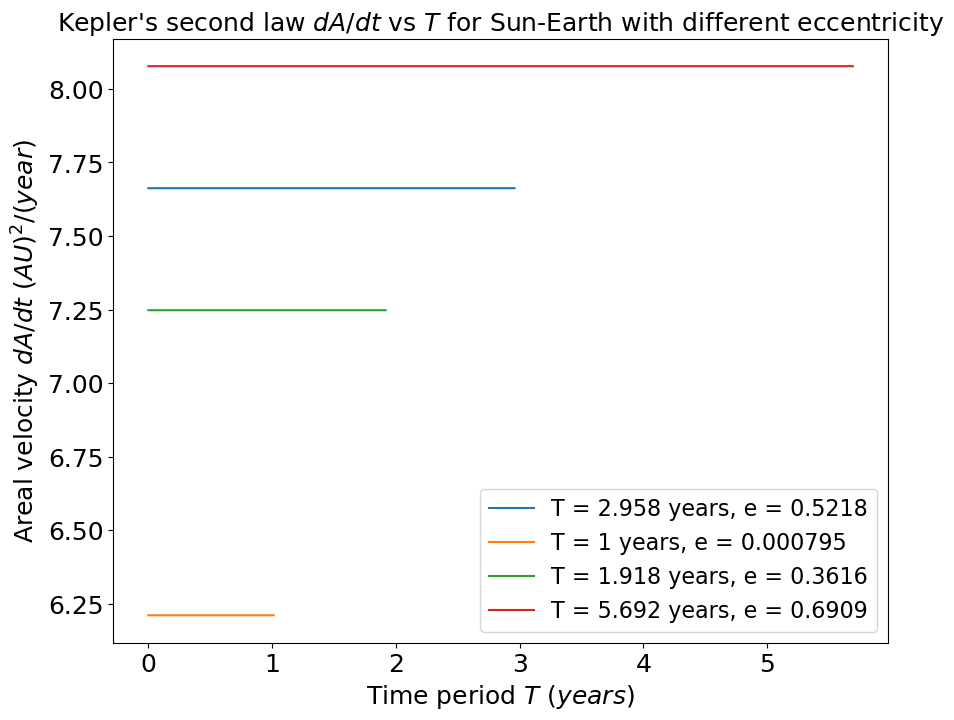

In [71]:
plt.figure(figsize=(10,8),dpi=100)
plt.plot(t,area,label='T = 2.958 years, e = 0.5218')
plt.plot(t2,area2,label = 'T = 1 years, e = 0.000795')
plt.plot(t3,area3,label='T = 1.918 years, e = 0.3616')
plt.plot(t4,area4,label = 'T = 5.692 years, e = 0.6909')
plt.title('Kepler\'s second law $dA/dt$ vs $T$ for Sun-Earth with different eccentricity',fontsize=18)
plt.xlabel('Time period $T$ $(years)$',fontsize=18)
plt.ylabel('Areal velocity $dA/dt$ $(AU)^2/(year)$',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.savefig('kepler-2.png')
plt.show()

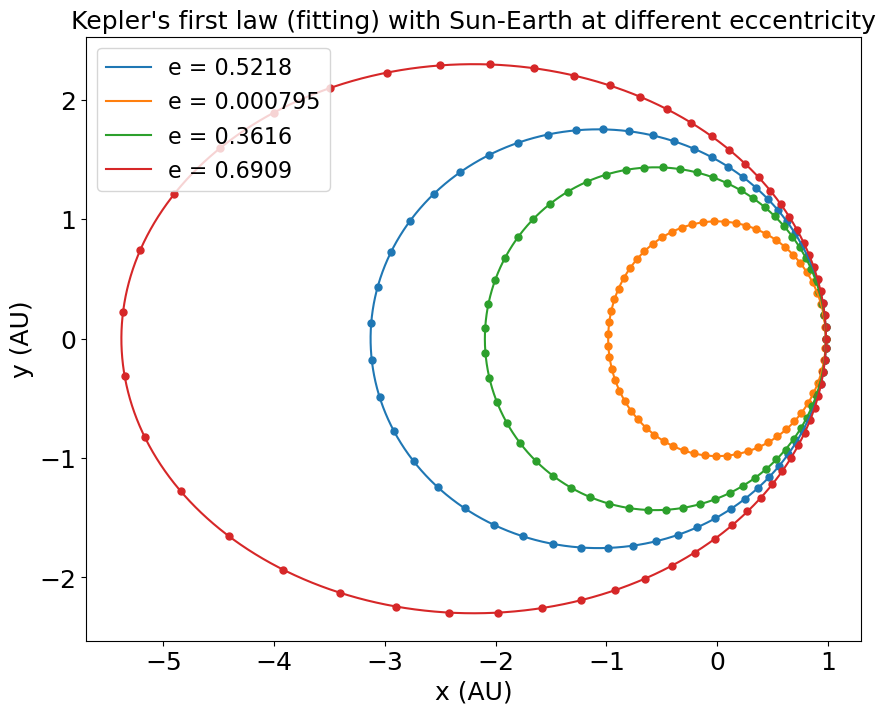

In [74]:
fit1 = elipse_fit(rx,ry,ecc1,major1)
fit2 = elipse_fit(rx2,ry2,ecc2,major2)
fit3 = elipse_fit(rx3,ry3,ecc3,major3)
fit4 = elipse_fit(rx4,ry4,ecc4,major4)

x = fit1[0]
y = fit1[1]
x2 = fit2[0]
y2 = fit2[1]
x3 = fit3[0]
y3 = fit3[1]
x4 = fit4[0]
y4 = fit4[1]

plt.figure(figsize=(10,8),dpi=100)
plt.scatter(x,y,s=25)
plt.plot(rx,ry,label='e = 0.5218')
plt.scatter(x2,y2,s=25)
plt.plot(rx2,ry2,label='e = 0.000795',)
plt.scatter(x3,y3,s=25)
plt.plot(rx3,ry3,label = 'e = 0.3616')
plt.scatter(x4,y4,s=25)
plt.plot(rx4,ry4,label = 'e = 0.6909')
plt.title('Kepler\'s first law (fitting) with Sun-Earth at different eccentricity',fontsize=18)
plt.xlabel('x (AU)',fontsize=18)
plt.ylabel('y (AU)',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.savefig('kepler-1.png')
plt.show()

# Third Law

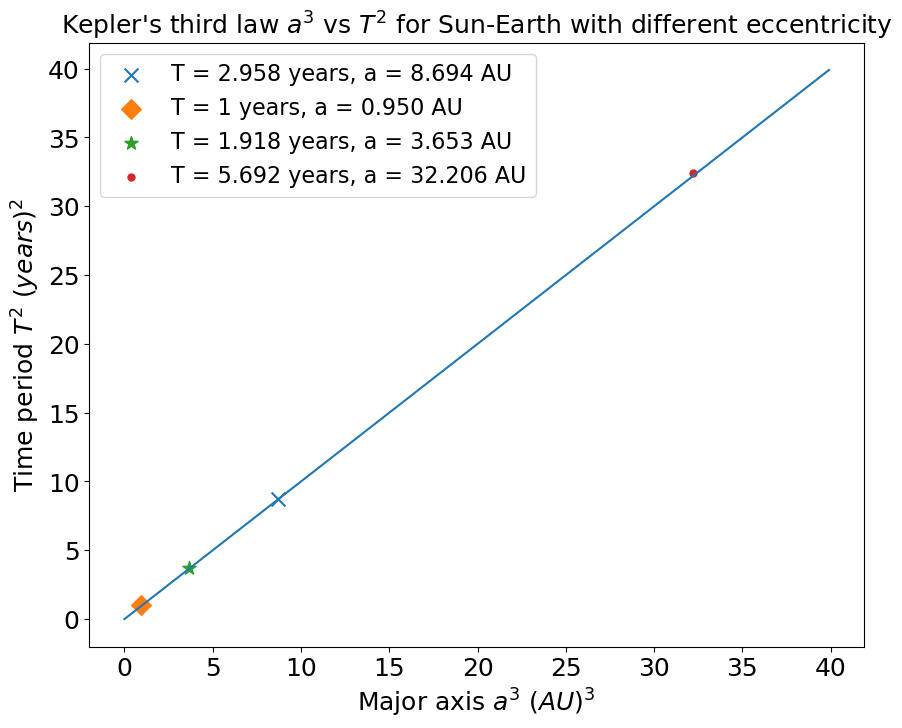

In [73]:
timeps = [np.power(1080/365,2.0), np.power(1,2.0), np.power(700/365,2.0) , np.power(2077.726/365,2.0)]
majors = [np.power(major1,3.0), np.power(major2,3.0), np.power(major3,3.0), np.power(major4,3.0)]
x=np.arange(0,40,0.1)
y=x
plt.figure(figsize=(10,8),dpi=100)
plt.scatter(majors[0],timeps[0],marker="x",s=100,label='T = 2.958 years, a = 8.694 AU' )
plt.scatter(majors[1],timeps[1],marker="D",s=100,label='T = 1 years, a = 0.950 AU')
plt.scatter(majors[2],timeps[2],marker="*",s=100,label='T = 1.918 years, a = 3.653 AU')
plt.scatter(majors[3],timeps[3],marker=".",s=100,label='T = 5.692 years, a = 32.206 AU')
plt.title('Kepler\'s third law $a^3$ vs $T^2$ for Sun-Earth with different eccentricity',fontsize=18)
plt.xlabel('Major axis $a^3$ $(AU)^3$',fontsize=18)
plt.ylabel('Time period $T^2$ $(years)^2$',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.plot(x,y)
plt.savefig('kepler-3.png')
plt.show()


In [33]:
print(majors[3])

32.20695933516566
